In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
cdf = pd.read_csv("datos_de_clientes.csv", delimiter="\t")
cdf

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


Lograr separar las columnas


# Transformación 1: Marital Status

Transformamos marital status para que quede con las caracteristicas correctas

In [101]:
estado_social = set(cdf["Marital_Status"])
estado_social

{'Absurd',
 'Alone',
 'Divorced',
 'Married',
 'Single',
 'Together',
 'Widow',
 'YOLO'}

In [102]:
absurd = 'Absurd'
conteo_social_absurd = (cdf['Marital_Status'] == absurd).sum()
print(f'El estado "{absurd}" se repite {conteo_social_absurd} veces.')

yolo = 'YOLO'
conteo_social_yolo = (cdf['Marital_Status'] == yolo).sum()
print(f'El estado "{yolo}" se repite {conteo_social_yolo} veces.')

alone = 'Alone'
conteo_social_alone = (cdf['Marital_Status'] == alone).sum()
print(f'El estado "{alone}" se repite {conteo_social_alone} veces.')

El estado "Absurd" se repite 2 veces.
El estado "YOLO" se repite 2 veces.
El estado "Alone" se repite 3 veces.


In [103]:
cdf = cdf.drop(cdf[cdf['Marital_Status'] == 'YOLO'].index)
cdf = cdf.drop(cdf[cdf['Marital_Status'] == 'Absurd'].index)
cdf = cdf.replace('Alone', 'Single')

divorced = 'Divorced'
conteo_social_divorced = (cdf['Marital_Status'] == divorced).sum()
print(f'El estado "{divorced}" se repite {conteo_social_divorced} veces.')

single = 'Single'
conteo_social_single = (cdf['Marital_Status'] == single).sum()
print(f'El estado "{single}" se repite {conteo_social_single} veces.')

married = 'Married'
conteo_social_married = (cdf['Marital_Status'] == married).sum()
print(f'El estado "{married}" se repite {conteo_social_married} veces.')

widow = 'Widow'
conteo_social_widow = (cdf['Marital_Status'] == widow).sum()
print(f'El estado "{widow}" se repite {conteo_social_widow} veces.')

together = 'Together'
conteo_social_together = (cdf['Marital_Status'] == together).sum()
print(f'El estado "{together}" se repite {conteo_social_together} veces.')

estado_social = set(cdf["Marital_Status"])
estado_social

El estado "Divorced" se repite 232 veces.
El estado "Single" se repite 483 veces.
El estado "Married" se repite 864 veces.
El estado "Widow" se repite 77 veces.
El estado "Together" se repite 580 veces.


{'Divorced', 'Married', 'Single', 'Together', 'Widow'}

In [104]:
cdf.iloc[:,3]

cdf = cdf.replace('Married', 'Couple')
cdf = cdf.replace('Together', 'Couple')
cdf = cdf.replace('Divorced', 'Single')
cdf = cdf.replace('Widow', 'Single')

social_numerico = {'Couple': 0, 'Single': 1}
cdf['Marital_Num'] = cdf['Marital_Status'].map(social_numerico)
soc_num = cdf.pop('Marital_Num')
cdf.insert(3, 'Marital_Num', soc_num)

cdf = cdf.drop(['Marital_Status'], axis=1)
cdf

,ID,Year_Birth,Education,Marital_Num,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,1,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,1,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,0,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,0,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,0,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,0,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,0,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,1,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,0,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [105]:
idx_columnas = cdf.columns.tolist()
for idx, nombre_columna in enumerate(idx_columnas):
    print(f"Índice de la columna '{nombre_columna}': {idx}")

Índice de la columna 'ID': 0
Índice de la columna 'Year_Birth': 1
Índice de la columna 'Education': 2
Índice de la columna 'Marital_Num': 3
Índice de la columna 'Income': 4
Índice de la columna 'Kidhome': 5
Índice de la columna 'Teenhome': 6
Índice de la columna 'Dt_Customer': 7
Índice de la columna 'Recency': 8
Índice de la columna 'MntWines': 9
Índice de la columna 'MntFruits': 10
Índice de la columna 'MntMeatProducts': 11
Índice de la columna 'MntFishProducts': 12
Índice de la columna 'MntSweetProducts': 13
Índice de la columna 'MntGoldProds': 14
Índice de la columna 'NumDealsPurchases': 15
Índice de la columna 'NumWebPurchases': 16
Índice de la columna 'NumCatalogPurchases': 17
Índice de la columna 'NumStorePurchases': 18
Índice de la columna 'NumWebVisitsMonth': 19
Índice de la columna 'AcceptedCmp3': 20
Índice de la columna 'AcceptedCmp4': 21
Índice de la columna 'AcceptedCmp5': 22
Índice de la columna 'AcceptedCmp1': 23
Índice de la columna 'AcceptedCmp2': 24
Índice de la column

# Transformación 2: Education

Se transforma la columna categorica education en numerico con indices para el clustering

In [106]:
education = set(cdf["Education"])
education

{'2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'}

In [107]:
second_cycle = '2n Cycle'
conteo_educacional_second_cycle = (cdf['Education'] == second_cycle).sum()
print(f'El estado "{second_cycle}" se repite {conteo_educacional_second_cycle} veces.')

basic = 'Basic'
conteo_educacional_basic = (cdf['Education'] == basic).sum()
print(f'El estado "{basic}" se repite {conteo_educacional_basic} veces.')

graduation = 'Graduation'
conteo_educacional_graduation = (cdf['Education'] == graduation).sum()
print(f'El estado "{graduation}" se repite {conteo_educacional_graduation} veces.')

master = 'Master'
conteo_educacional_master = (cdf['Education'] == master).sum()
print(f'El estado "{master}" se repite {conteo_educacional_master} veces.')

phd = 'PhD'
conteo_educacional_phd = (cdf['Education'] == phd).sum()
print(f'El estado "{phd}" se repite {conteo_educacional_phd} veces.')

El estado "2n Cycle" se repite 203 veces.
El estado "Basic" se repite 54 veces.
El estado "Graduation" se repite 1126 veces.
El estado "Master" se repite 369 veces.
El estado "PhD" se repite 484 veces.


In [108]:
cdf.iloc[:,2]

0       Graduation
1       Graduation
2       Graduation
3       Graduation
4              PhD
           ...    
2235    Graduation
2236           PhD
2237    Graduation
2238        Master
2239           PhD
Name: Education, Length: 2236, dtype: object

In [109]:
educacion_numerico = {'2n Cycle': 0, 'Basic': 1, 'Graduation': 2, 'Master': 3, 'PhD': 4}
cdf['Educational_Num'] = cdf['Education'].map(educacion_numerico)
ed_num = cdf.pop('Educational_Num')
cdf.insert(3, 'Educational_num', ed_num)
cdf = cdf.drop(['Education'], axis=1)

cdf

,ID,Year_Birth,Educational_num,Marital_Num,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,2,1,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,2,1,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,2,0,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,2,0,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,4,0,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,0,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,4,0,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,2,1,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,3,0,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


# Tranformacion 3: Young Sons

Unifica Kidhome y teenhome para mantener el contro de hijosjovenes en una sola columna

In [110]:
cdf['Young_Sons'] = cdf['Kidhome'] + cdf['Teenhome']
hijos = cdf.pop('Young_Sons')
cdf.insert(7, 'Young_Sons', hijos)
hijos = cdf.iloc[:, [7]]
cdf = cdf.drop(['Kidhome', 'Teenhome'], axis=1)

# Transformación 4: Deals accepted


Junta las columnas de ofertas aceptadas de los clientes, puesto que separadas no aportaban muchoa información y añadian datos que no eran analizables, combinandolos en una sola columna para confirmar si el cliente compra ofertas o no

In [111]:
cdf['Deals_Accepted'] = cdf['AcceptedCmp1'] + cdf['AcceptedCmp2'] + cdf['AcceptedCmp3'] + cdf['AcceptedCmp4'] + cdf['AcceptedCmp5']
ofertas = cdf.pop('Deals_Accepted')
cdf.insert(19, 'Deals_Accepted', ofertas)
ofertas = cdf.iloc[:, [19]]
print(ofertas)
cdf = cdf.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], axis=1)

      Deals_Accepted
0                  0
1                  0
2                  0
3                  0
4                  0
...              ...
2235               0
2236               1
2237               1
2238               0
2239               0

[2236 rows x 1 columns]


# Transformación 5: Z data

Se eliminan los datos z costcontact y z revenue por ser una constante que no aportaba nada

In [112]:
cdf = cdf.drop(['Z_CostContact', 'Z_Revenue'], axis=1)
cdf

,ID,Year_Birth,Educational_num,Marital_Num,Income,Young_Sons,Dt_Customer,Recency,MntWines,MntFruits,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Deals_Accepted,Complain,Response
0,5524,1957,2,1,58138.0,0,04-09-2012,58,635,88,...,88,88,3,8,10,4,7,0,0,1
1,2174,1954,2,1,46344.0,2,08-03-2014,38,11,1,...,1,6,2,1,1,2,5,0,0,0
2,4141,1965,2,0,71613.0,0,21-08-2013,26,426,49,...,21,42,1,8,2,10,4,0,0,0
3,6182,1984,2,0,26646.0,1,10-02-2014,26,11,4,...,3,5,2,2,0,4,6,0,0,0
4,5324,1981,4,0,58293.0,1,19-01-2014,94,173,43,...,27,15,5,5,3,6,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,0,61223.0,1,13-06-2013,46,709,43,...,118,247,2,9,3,4,5,0,0,0
2236,4001,1946,4,0,64014.0,3,10-06-2014,56,406,0,...,0,8,7,8,2,5,7,1,0,0
2237,7270,1981,2,1,56981.0,0,25-01-2014,91,908,48,...,12,24,1,2,3,13,6,1,0,0
2238,8235,1956,3,0,69245.0,1,24-01-2014,8,428,30,...,30,61,2,6,5,10,3,0,0,0


In [113]:
idx_columnas = cdf.columns.tolist()
for idx, nombre_columna in enumerate(idx_columnas):
    print(f"Índice de la columna '{nombre_columna}': {idx}")

Índice de la columna 'ID': 0
Índice de la columna 'Year_Birth': 1
Índice de la columna 'Educational_num': 2
Índice de la columna 'Marital_Num': 3
Índice de la columna 'Income': 4
Índice de la columna 'Young_Sons': 5
Índice de la columna 'Dt_Customer': 6
Índice de la columna 'Recency': 7
Índice de la columna 'MntWines': 8
Índice de la columna 'MntFruits': 9
Índice de la columna 'MntMeatProducts': 10
Índice de la columna 'MntFishProducts': 11
Índice de la columna 'MntSweetProducts': 12
Índice de la columna 'MntGoldProds': 13
Índice de la columna 'NumDealsPurchases': 14
Índice de la columna 'NumWebPurchases': 15
Índice de la columna 'NumCatalogPurchases': 16
Índice de la columna 'NumStorePurchases': 17
Índice de la columna 'NumWebVisitsMonth': 18
Índice de la columna 'Deals_Accepted': 19
Índice de la columna 'Complain': 20
Índice de la columna 'Response': 21


# Transformación 6: Age

Se realiza un analisis inicial con relacion al año de nacimiento de los clientes para luego pasarlo a edad, se eliminan unos datos atipicos 

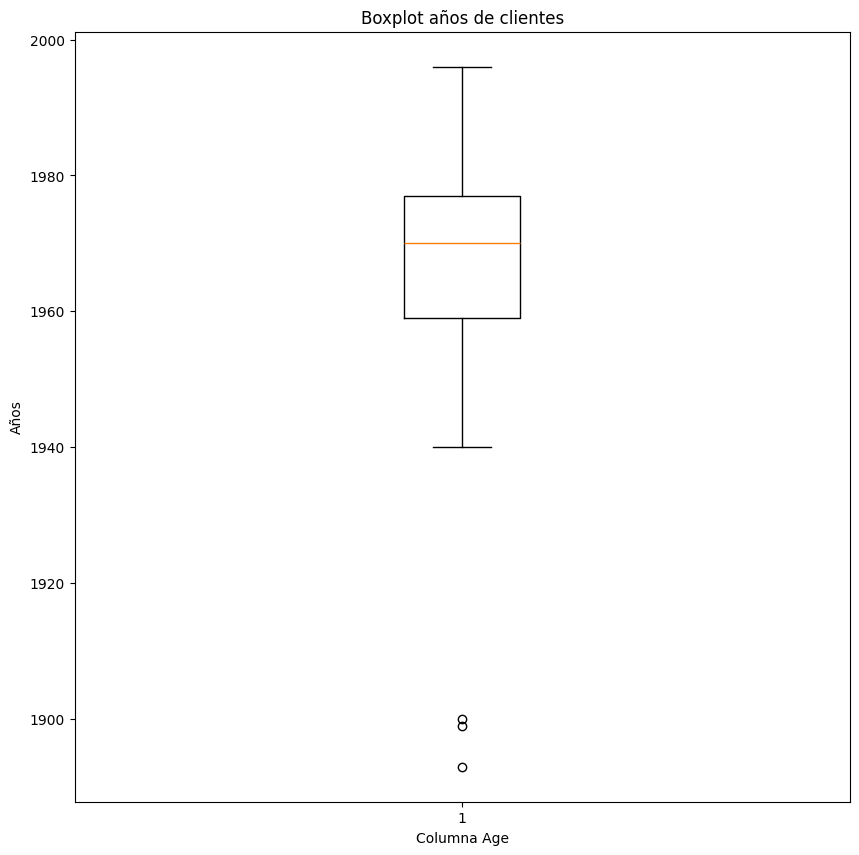

In [114]:
years = cdf.iloc[:, 1]
plt.figure(figsize =(10, 10))
plt.boxplot(years)
plt.title('Boxplot años de clientes')
plt.ylabel('Años')
plt.xlabel('Columna Age')
plt.show()

In [115]:
cdf = cdf[cdf.Year_Birth > 1920]

In [116]:
tiempo_actual = 2024
cdf['Age'] = tiempo_actual - cdf['Year_Birth']
edad = cdf.pop('Age')
cdf.insert(2, 'Age', edad)

C:\Users\JULIAN PULIDO CASTRO\AppData\Local\Temp\ipykernel_15116\3321122870.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



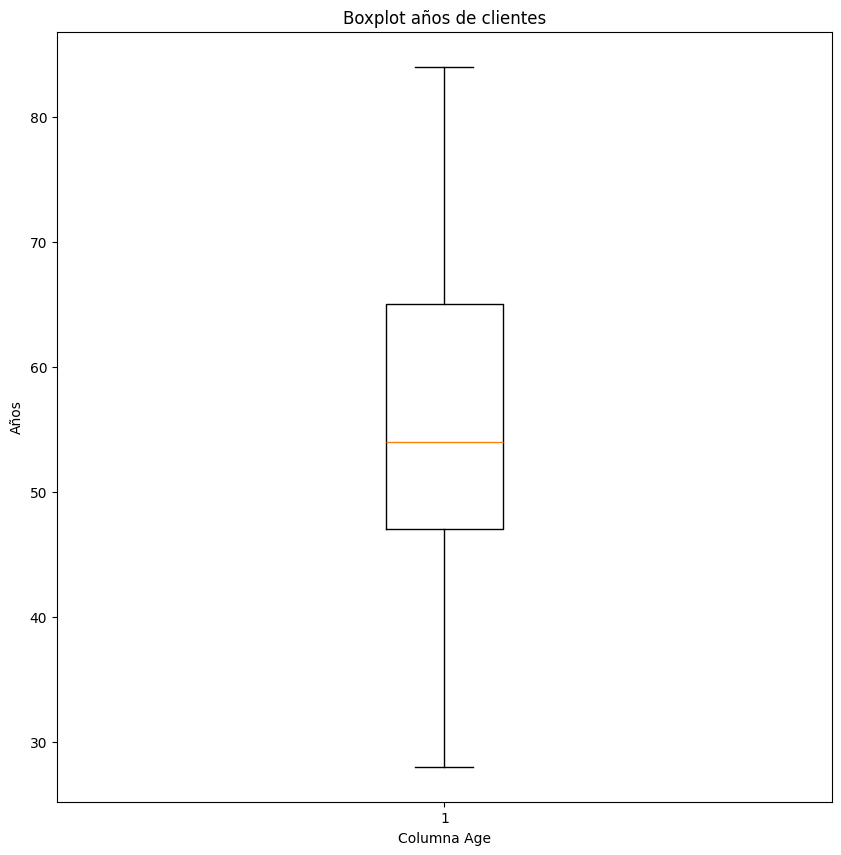

El valor de la mediana es  54.0
El valor de la media es  55.10747872816838


In [117]:
edad = cdf.iloc[:, 2]
mediana = np.median(edad)
media = np.mean(edad)
plt.figure(figsize =(10, 10))
plt.boxplot(edad)
plt.title('Boxplot años de clientes')
plt.ylabel('Años')
plt.xlabel('Columna Age')
plt.show()
print("El valor de la mediana es ", mediana)
print("El valor de la media es ", media)

In [118]:
cdf.drop(columns=['ID', 'Year_Birth'], inplace=True)

C:\Users\JULIAN PULIDO CASTRO\AppData\Local\Temp\ipykernel_15116\4076401970.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [119]:
from sklearn.impute import KNNImputer
import pandas as pd

cdf = cdf.drop('Dt_Customer', axis=1)

nan_instance = cdf[cdf.isna().any(axis=1)]
display(nan_instance)

k = 1

imputer = KNNImputer(n_neighbors=k)

filled_cdf = imputer.fit_transform(cdf)

cdf = pd.DataFrame(filled_cdf, columns=cdf.columns)




nan_instance = cdf[cdf.isna().any(axis=1)]
display(nan_instance)

display(cdf)

,Age,Educational_num,Marital_Num,Income,Young_Sons,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Deals_Accepted,Complain,Response
10,41,2,0,NaN,1,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0
27,38,2,1,NaN,1,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0
43,65,4,1,NaN,0,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0
48,73,2,1,NaN,3,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0
58,42,2,1,NaN,1,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0
71,51,0,0,NaN,1,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0
90,67,4,0,NaN,3,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0
91,67,2,1,NaN,2,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0
92,51,3,0,NaN,0,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0
128,63,4,0,NaN,1,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0


,Age,Educational_num,Marital_Num,Income,Young_Sons,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Deals_Accepted,Complain,Response


,Age,Educational_num,Marital_Num,Income,Young_Sons,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Deals_Accepted,Complain,Response
0,67.0,2.0,1.0,58138.0,0.0,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,1.0
1,70.0,2.0,1.0,46344.0,2.0,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0
2,59.0,2.0,0.0,71613.0,0.0,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,0.0,0.0,0.0
3,40.0,2.0,0.0,26646.0,1.0,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0
4,43.0,4.0,0.0,58293.0,1.0,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,57.0,2.0,0.0,61223.0,1.0,46.0,709.0,43.0,182.0,42.0,118.0,247.0,2.0,9.0,3.0,4.0,5.0,0.0,0.0,0.0
2229,78.0,4.0,0.0,64014.0,3.0,56.0,406.0,0.0,30.0,0.0,0.0,8.0,7.0,8.0,2.0,5.0,7.0,1.0,0.0,0.0
2230,43.0,2.0,1.0,56981.0,0.0,91.0,908.0,48.0,217.0,32.0,12.0,24.0,1.0,2.0,3.0,13.0,6.0,1.0,0.0,0.0
2231,68.0,3.0,0.0,69245.0,1.0,8.0,428.0,30.0,214.0,80.0,30.0,61.0,2.0,6.0,5.0,10.0,3.0,0.0,0.0,0.0


# Analisis 1 y transformación 7: Compras

Se hace un diagrama de barras para saber donde mas compran los clientes

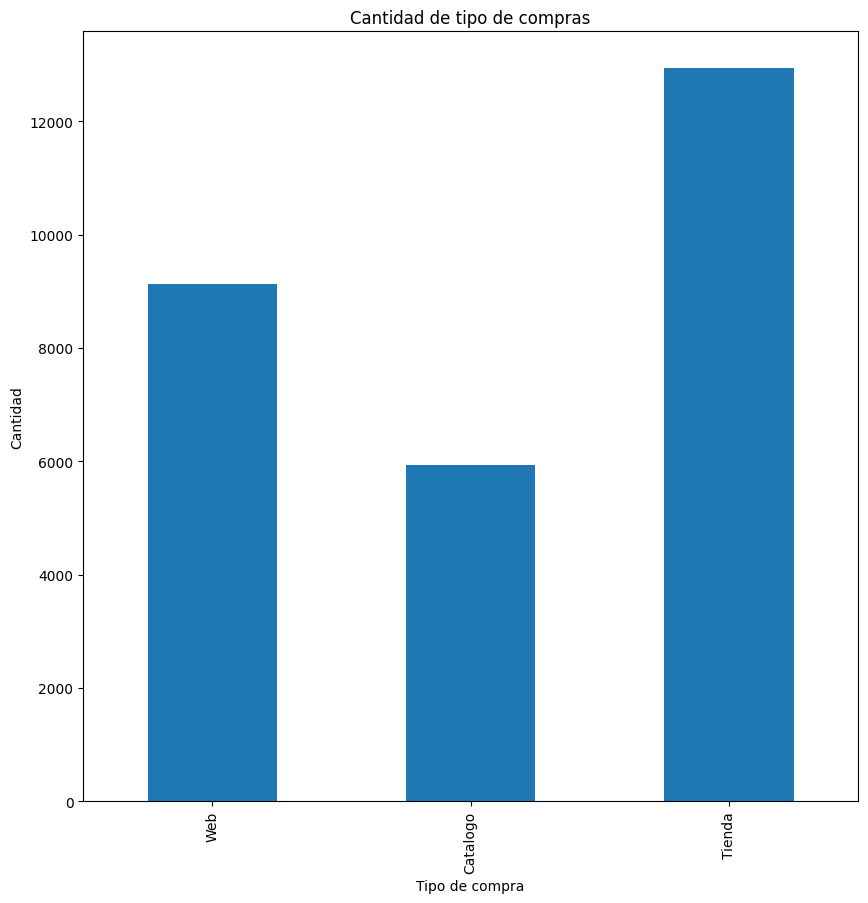

In [120]:
suma_web = cdf['NumWebPurchases'].sum()
suma_catalogo = cdf['NumCatalogPurchases'].sum()
suma_tienda = cdf['NumStorePurchases'].sum()

cantidad_compras = pd.Series([suma_web, suma_catalogo, suma_tienda])
plt.figure(figsize=(10,10))
cantidad_compras.plot(kind='bar')
plt.title('Cantidad de tipo de compras')
plt.xlabel('Tipo de compra')
plt.ylabel('Cantidad')
plt.xticks(range(len(cantidad_compras)), ['Web', 'Catalogo', 'Tienda'])
plt.show()

In [121]:
compras = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
cdf['Total_Buy'] = cdf[compras].sum(axis=1)
cdf['Most_Buys'] = cdf[compras].idxmax(axis=1)
tot_buy_num = cdf.pop('Total_Buy')
cdf.insert(15, 'Total_Buy', tot_buy_num)

compras_numerico = {'NumWebPurchases': 0, 'NumCatalogPurchases': 1, 'NumStorePurchases': 2}
cdf['Most_Buys_Num'] = cdf['Most_Buys'].map(compras_numerico)
buy_num = cdf.pop('Most_Buys_Num')
cdf.insert(14, 'Most_Buys_Num', buy_num)
cdf = cdf.drop(['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Most_Buys'], axis=1)

cdf

,Age,Educational_num,Marital_Num,Income,Young_Sons,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,Most_Buys_Num,Total_Buy,NumWebVisitsMonth,Deals_Accepted,Complain,Response
0,67.0,2.0,1.0,58138.0,0.0,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,1,22.0,7.0,0.0,0.0,1.0
1,70.0,2.0,1.0,46344.0,2.0,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,2,4.0,5.0,0.0,0.0,0.0
2,59.0,2.0,0.0,71613.0,0.0,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,2,20.0,4.0,0.0,0.0,0.0
3,40.0,2.0,0.0,26646.0,1.0,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2,6.0,6.0,0.0,0.0,0.0
4,43.0,4.0,0.0,58293.0,1.0,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,2,14.0,5.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,57.0,2.0,0.0,61223.0,1.0,46.0,709.0,43.0,182.0,42.0,118.0,247.0,2.0,0,16.0,5.0,0.0,0.0,0.0
2229,78.0,4.0,0.0,64014.0,3.0,56.0,406.0,0.0,30.0,0.0,0.0,8.0,7.0,0,15.0,7.0,1.0,0.0,0.0
2230,43.0,2.0,1.0,56981.0,0.0,91.0,908.0,48.0,217.0,32.0,12.0,24.0,1.0,2,18.0,6.0,1.0,0.0,0.0
2231,68.0,3.0,0.0,69245.0,1.0,8.0,428.0,30.0,214.0,80.0,30.0,61.0,2.0,2,21.0,3.0,0.0,0.0,0.0


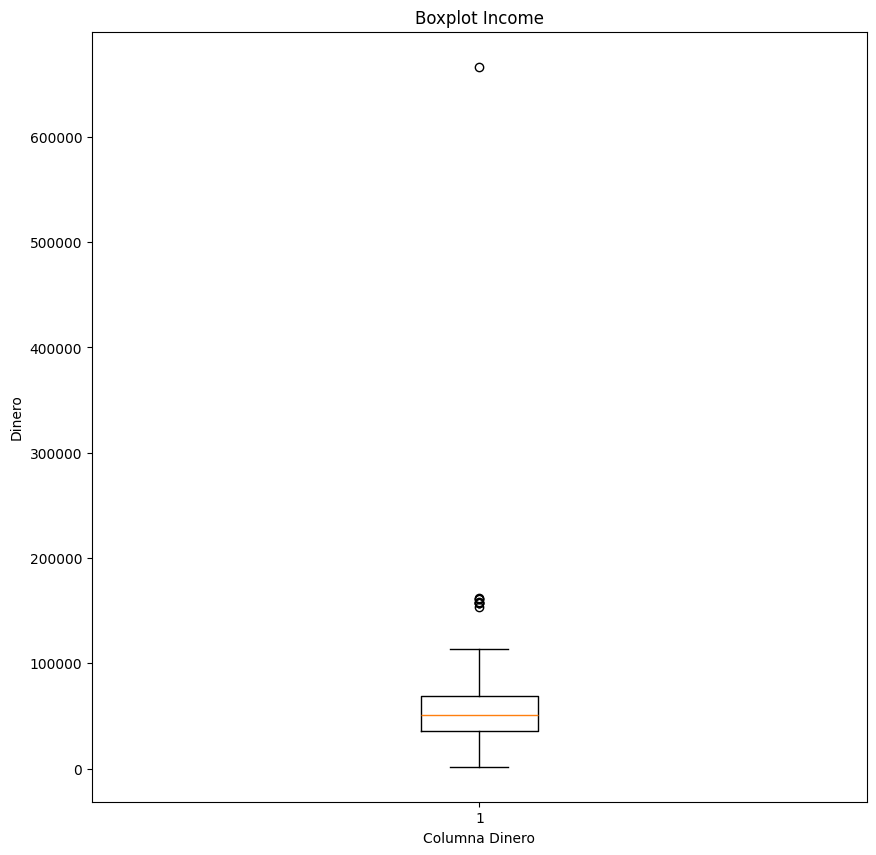

In [122]:
income = cdf.iloc[:, 3]
plt.figure(figsize =(10, 10))
plt.boxplot(income)
plt.title('Boxplot Income')
plt.ylabel('Dinero')
plt.xlabel('Columna Dinero')
plt.show()

In [123]:
cdf = cdf[cdf.Income < 200000]

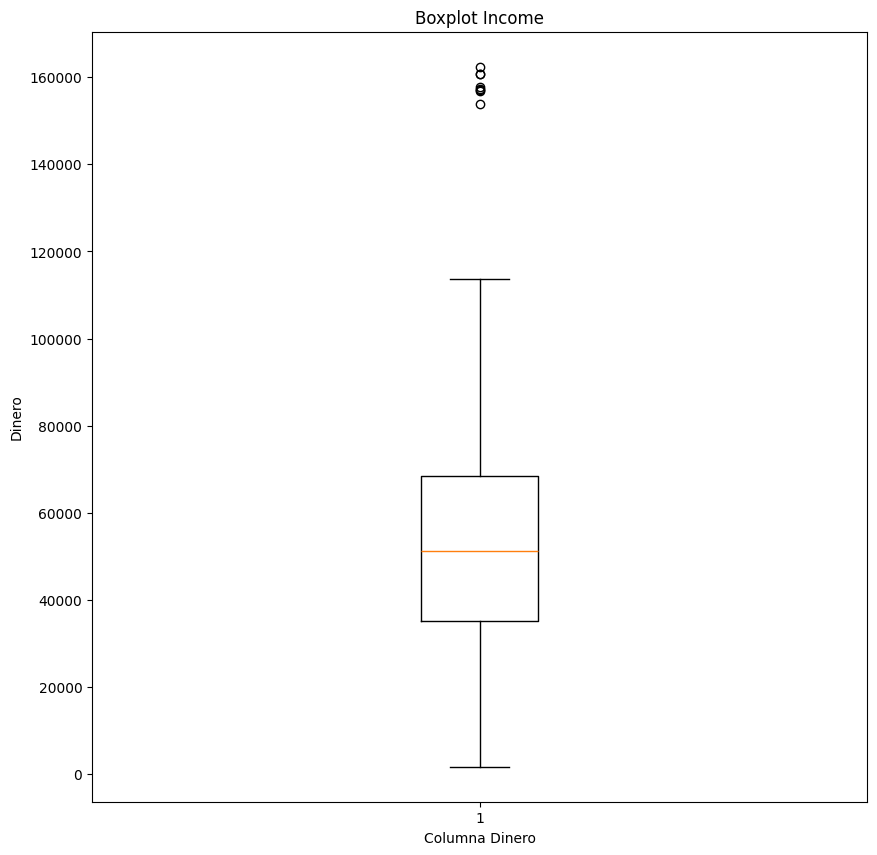

In [124]:
plt.figure(figsize =(10, 10))
plt.boxplot(cdf['Income'])
plt.title('Boxplot Income')
plt.ylabel('Dinero')
plt.xlabel('Columna Dinero')
plt.show()

# Normalizaciones

In [125]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

columns_to_normalize_range = ['Income', 'MntWines', 'MntFruits', 'MntSweetProducts', 'MntGoldProds', 'MntMeatProducts', 'MntFishProducts', 'Educational_num', 'Age', 'Marital_Num', 'Young_Sons', 'Recency', 'NumDealsPurchases', 'Most_Buys_Num', 'Total_Buy', 'NumWebVisitsMonth', 'Deals_Accepted', 'Complain', 'Response']
#columns_to_normalize_z = ['Income']

cdf_normalized = cdf.copy()

scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

#cdf_normalized[columns_to_normalize_z] = scaler.fit_transform(cdf_normalized[columns_to_normalize_z])
cdf_normalized[columns_to_normalize_range] = min_max_scaler.fit_transform(cdf_normalized[columns_to_normalize_range])

display(cdf_normalized)  

,Age,Educational_num,Marital_Num,Income,Young_Sons,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,Most_Buys_Num,Total_Buy,NumWebVisitsMonth,Deals_Accepted,Complain,Response
0,0.696429,0.50,1.0,0.351086,0.000000,0.585859,0.425318,0.442211,0.316522,0.664093,0.334601,0.243094,0.200000,0.5,0.68750,0.35,0.00,0.0,1.0
1,0.750000,0.50,1.0,0.277680,0.666667,0.383838,0.007368,0.005025,0.003478,0.007722,0.003802,0.016575,0.133333,1.0,0.12500,0.25,0.00,0.0,0.0
2,0.553571,0.50,0.0,0.434956,0.000000,0.262626,0.285332,0.246231,0.073623,0.428571,0.079848,0.116022,0.066667,1.0,0.62500,0.20,0.00,0.0,0.0
3,0.214286,0.50,0.0,0.155079,0.333333,0.262626,0.007368,0.020101,0.011594,0.038610,0.011407,0.013812,0.133333,1.0,0.18750,0.30,0.00,0.0,0.0
4,0.267857,1.00,0.0,0.352051,0.333333,0.949495,0.115874,0.216080,0.068406,0.177606,0.102662,0.041436,0.333333,1.0,0.43750,0.25,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,0.517857,0.50,0.0,0.370288,0.333333,0.464646,0.474883,0.216080,0.105507,0.162162,0.448669,0.682320,0.133333,0.0,0.50000,0.25,0.00,0.0,0.0
2229,0.892857,1.00,0.0,0.387659,1.000000,0.565657,0.271936,0.000000,0.017391,0.000000,0.000000,0.022099,0.466667,0.0,0.46875,0.35,0.25,0.0,0.0
2230,0.267857,0.50,1.0,0.343885,0.000000,0.919192,0.608171,0.241206,0.125797,0.123552,0.045627,0.066298,0.066667,1.0,0.56250,0.30,0.25,0.0,0.0
2231,0.714286,0.75,0.0,0.420217,0.333333,0.080808,0.286671,0.150754,0.124058,0.308880,0.114068,0.168508,0.133333,1.0,0.65625,0.15,0.00,0.0,0.0


# Revisión K-means

#### Cargamos funciones necesarias para las metricas

In [126]:

def PCA(D, red):
    D.T
    mu = np.mean(D, axis=0)
    Z = D - mu
    cov_matrix = np.cov(Z, rowvar=False, bias=False)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    
    sorted_indices = np.argsort(eigenvalues)[::-1]

    topEigenvalues = eigenvalues[sorted_indices]
    topEigenVector = eigenvectors[:,sorted_indices]
    cumvariance = np.cumsum(topEigenvalues)
    
    if red < 1:
        total_variance = np.sum(topEigenvalues)
        cumvariance = np.cumsum(topEigenvalues)
        variance_top = red * total_variance
        numdims = np.argmax(cumvariance >= variance_top) + 1
    else:
        numdims = red
    top_eigenvectors = topEigenVector[:, :numdims] 
    total_variance = np.sum(topEigenvalues[:numdims]) 
    variance = total_variance / np.sum(topEigenvalues)
    A = np.dot(Z, top_eigenvectors)

    v = np.sum(topEigenvalues[:numdims])
    varianceTotal = np.sum(topEigenvalues)      


    
    return A, v, varianceTotal

def getDistances(A):
    if not isinstance(A, np.ndarray):
        A = A.values.reshape(-1, A.shape[-1])

    n = A.shape[0]
    Distance = np.zeros((n,n))
    for i in range(n):
        for j in range(i, n):
            Distance[i,j] = np.linalg.norm(A[i] - A[j])
            Distance[j,i] = Distance[i,j]
    return Distance


def getW(D,U,V):
    weight = 0
    for i in U:
        for j in V:
            weight += D[i,j]
    return weight
    


def getWIn(D,C):
    Win = 0
    clusters = set(C)
    for cluster in clusters:
        indices = [i for i, x in enumerate(C) if x == cluster]
        Win += getW(D, indices, indices)
    return round(Win/2, 0)

def getWOut(D,C):
    Wout = 0
    clusters = set(C)
    for cluster in clusters:
        indices = [i for i, x in enumerate(C) if x == cluster]
        for i in indices:
            for j in range(len(D)):
                if j in indices:
                    continue
                Wout += D[i,j]
    return round(Wout/2,0)

def getNIn(C):
    Nin = 0
    clusters = set(C)
    for cluster in clusters:
        n = [i for i, x in enumerate(C) if x == cluster]
        Nin += len(n) * (len(n)-1)/2
    return Nin

def getNOut(C):
    n = len(C)
    Nout = (n*(n-1)/2) - getNIn(C)
    return Nout

def getBetaCV(A, C):
    D = getDistances(A)

    
    W_in = getWIn(D, C)
    W_out = getWOut(D, C)
    N_in = getNIn(C)
    N_out = getNOut(C)
    
    if N_in != 0 and N_out != 0:
        beta_cv = (W_in / N_in) / (W_out / N_out)
    else:
        return None
    
    return beta_cv

def getCIndex(A,C):
    
    D = getDistances(A)
    Nin = getNIn(C)
    Win = getWIn(D, C)
    Wflat = np.ravel(D)
    Wmin = np.sum(np.partition(Wflat, int(Nin))[:int(Nin)])
    Wmax = np.sum(np.partition(Wflat, -int(Nin))[-int(Nin):])
    
    CIndex = ((Win - Wmin)/(Wmax - Wmin))/2
    return CIndex

def getDunn(A, C):
  
    D = getDistances(A)  

    n = len(C)

    mask = np.zeros_like(D, dtype=bool)
    
    np.fill_diagonal(mask, True)  
    for i in range(n):
        for j in range(i + 1, n):
            mask[i, j] = mask[j, i] = C[i] == C[j]  

    w_in = D[mask]
    w_max_in = w_in.max()

    w_out = D[~mask]  
    if len(w_out) > 0:
        w_min_out = np.min(w_out[w_out != 0])
        return w_min_out / w_max_in
    else:
        return None  

### K-Means

Graficamos resultados de KMeans por metrica, revisando que cantidad de clusters se comporta mejor

In [127]:
from sklearn.cluster import KMeans
from sklearn import metrics
import pandas as pd

def evaluate_kmeans(df, k_values):
    results = []

    for k in k_values:
        kmeans = KMeans(n_clusters=k, init='random', n_init=15)
        kmeans_labels = kmeans.fit_predict(df)
        
        # Calcular métricas
        silhouette = metrics.silhouette_score(df, kmeans_labels)
        db_score = metrics.davies_bouldin_score(df, kmeans_labels)
        c_index = getCIndex(df, kmeans_labels)
        beta_cv = getBetaCV(df, kmeans_labels)
        
        # Guardar resultados
        results.append({
            'k': k,
            'silhouette': silhouette,
            'db_score': db_score,
            'c_index': c_index,
            'beta_cv': beta_cv,
        })

    # Convertir resultados a DataFrame
    results_df = pd.DataFrame(results)
    
    # Ordenar DataFrame por cada métrica
    sorted_by_silhouette = results_df.sort_values(by='silhouette', ascending=False)
    sorted_by_db_score = results_df.sort_values(by='db_score', ascending=True)
    sorted_by_c_index = results_df.sort_values(by='c_index', ascending=True)
    sorted_by_beta_cv = results_df.sort_values(by='beta_cv', ascending=True)
    
    return sorted_by_silhouette, sorted_by_db_score, sorted_by_c_index, sorted_by_beta_cv

# Valores de k para probar
k_values = [2, 3, 4, 5, 6]

# Evaluar K-Means
sorted_by_silhouette, sorted_by_db_score, sorted_by_c_index, sorted_by_beta_cv = evaluate_kmeans(cdf_normalized, k_values)

print("Top 5 combinaciones por métrica:")
print("Silhouette Score:")
display(sorted_by_silhouette.head())
print("\nDavies-Bouldin Score:")
display(sorted_by_db_score.head())
print("\nC Index:")
display(sorted_by_c_index.head())
print("\nBeta CV:")
display(sorted_by_beta_cv.head())


Top 5 combinaciones por métrica:
Silhouette Score:


,k,silhouette,db_score,c_index,beta_cv
2,4,0.231426,1.516668,0.118164,0.672732
4,6,0.230471,1.533376,0.104319,0.623671
0,2,0.225249,1.855779,0.170329,0.773639
1,3,0.224507,1.666096,0.142037,0.725403
3,5,0.203295,1.559718,0.116498,0.653620



Davies-Bouldin Score:


,k,silhouette,db_score,c_index,beta_cv
2,4,0.231426,1.516668,0.118164,0.672732
4,6,0.230471,1.533376,0.104319,0.623671
3,5,0.203295,1.559718,0.116498,0.653620
1,3,0.224507,1.666096,0.142037,0.725403
0,2,0.225249,1.855779,0.170329,0.773639



C Index:


,k,silhouette,db_score,c_index,beta_cv
4,6,0.230471,1.533376,0.104319,0.623671
3,5,0.203295,1.559718,0.116498,0.653620
2,4,0.231426,1.516668,0.118164,0.672732
1,3,0.224507,1.666096,0.142037,0.725403
0,2,0.225249,1.855779,0.170329,0.773639



Beta CV:


,k,silhouette,db_score,c_index,beta_cv
4,6,0.230471,1.533376,0.104319,0.623671
3,5,0.203295,1.559718,0.116498,0.653620
2,4,0.231426,1.516668,0.118164,0.672732
1,3,0.224507,1.666096,0.142037,0.725403
0,2,0.225249,1.855779,0.170329,0.773639


### Metricas para DBSCAN

Prueba para revisar metricas optimas para DBSCAN

#### Mediante metodo de elbow

[0.4954881014284988, 0.5210268004942823, 0.5423393947331216, 0.5607170348523299, 0.5768606188752741] [20, 25, 30, 35, 40]


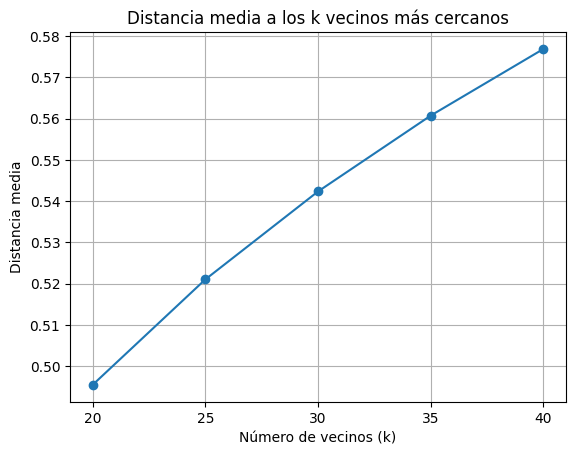

In [128]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors



# Entrenar un modelo k-NN con diferentes valores de k
k_values = [20, 25, 30, 35, 40]  # Valores de k a probar
distances = []  # Almacenar las distancias de los k vecinos más cercanos para cada valor de k

for k in k_values:
    knn = NearestNeighbors(n_neighbors=k)
    knn.fit(cdf_normalized)
    # Calcular las distancias a los k vecinos más cercanos para cada punto
    dist, _ = knn.kneighbors(cdf_normalized)
    # Calcular la distancia media a los k vecinos más cercanos para cada punto
    avg_distances = np.mean(dist, axis=1)
    # Calcular la distancia media global
    mean_avg_distance = np.mean(avg_distances)
    distances.append(mean_avg_distance)

print(distances, k_values)
# Graficar los resultados
plt.plot(k_values, distances, marker='o')
plt.title('Distancia media a los k vecinos más cercanos')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Distancia media')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [129]:
from sklearn.neighbors import NearestNeighbors
import plotly.express as px
neighbors = 20

nbrs = NearestNeighbors(n_neighbors=neighbors ).fit(cdf_normalized)
distances, indices = nbrs.kneighbors(cdf_normalized)
distance_desc = sorted(distances[:,neighbors-1], reverse=True)
px.line(x=list(range(1,len(distance_desc )+1)),y= distance_desc )

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'showlegend': False,
              'type': 'scattergl',
              'x': array([   1,    2,    3, ..., 2230, 2231, 2232], dtype=int64),
              'xaxis': 'x',
              'y': array([1.54672878, 1.47227144, 1.46847751, ..., 0.20057723, 0.19711561,
                          0.18567491]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}}}
})

#### Pruebas de Metricas con combinaciones de metricas de 0.1 a 1.0 con Minpts de 10, 20 y 30

In [130]:

from sklearn.cluster import DBSCAN
from sklearn import metrics
import itertools
def evaluate_dbscan(df, minPts_values, eps_values):
    results = []

    for minPts, eps in itertools.product(minPts_values, eps_values):
        dbscan = DBSCAN(eps=eps, min_samples=minPts)
        dbscan_labels = dbscan.fit_predict(df)
        
        # Excluir el cluster de ruido (-1)
        unique_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        if unique_clusters < 2:
            continue
        
        # Calcular métricas
        silhouette = metrics.silhouette_score(df, dbscan_labels)
        db_score = metrics.davies_bouldin_score(df, dbscan_labels)
        c_index = getCIndex(df, dbscan_labels)
        beta_cv = getBetaCV(df, dbscan_labels)
        dunn = getDunn(df, dbscan_labels)
        
        # Guardar resultados
        results.append({
            'minPts': minPts,
            'eps': eps,
            'unique_clusters': unique_clusters,
            'silhouette': silhouette,
            'db_score': db_score,
            'c_index': c_index,
            'beta_cv': beta_cv,
            'dunn': dunn
        })

    # Convertir resultados a DataFrame
    results_df = pd.DataFrame(results)
    
    # Ordenar DataFrame por cada métrica
    sorted_by_silhouette = results_df.sort_values(by='silhouette', ascending=False)
    sorted_by_db_score = results_df.sort_values(by='db_score', ascending=True)
    sorted_by_c_index = results_df.sort_values(by='c_index', ascending=True)
    sorted_by_beta_cv = results_df.sort_values(by='beta_cv', ascending=True)
    sorted_by_dunn = results_df.sort_values(by='dunn', ascending=False)
    
    return sorted_by_silhouette, sorted_by_db_score, sorted_by_c_index, sorted_by_beta_cv, sorted_by_dunn


minPts_values = [5, 10]  # Valores de minPts para probar
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]  # Valores de epsilon para probar
sorted_by_silhouette, sorted_by_db_score, sorted_by_c_index, sorted_by_beta_cv, sorted_by_dunn = evaluate_dbscan(cdf_normalized, minPts_values, eps_values)

print("Top 5 combinaciones por métrica:")
print("Silhouette Score:")
display(sorted_by_silhouette.head())
print("\nDavies-Bouldin Score:")
display(sorted_by_db_score.head())
print("\nC Index:")
display(sorted_by_c_index.head())
print("\nBeta CV:")
display(sorted_by_beta_cv.head())
print("\nDunn Index:")
display(sorted_by_dunn.head())



Top 5 combinaciones por métrica:
Silhouette Score:


,minPts,eps,unique_clusters,silhouette,db_score,c_index,beta_cv,dunn
17,10,0.9,4,0.234207,2.624537,0.128056,0.697855,0.232642
16,10,0.8,4,0.225620,2.627900,0.127312,0.696466,0.184799
18,10,1.0,2,0.223230,2.649452,0.166446,0.767154,0.221346
8,5,0.9,5,0.211571,2.324927,0.128015,0.697769,0.232826
7,5,0.8,5,0.206312,2.407431,0.127351,0.696525,0.186326



Davies-Bouldin Score:


,minPts,eps,unique_clusters,silhouette,db_score,c_index,beta_cv,dunn
0,5,0.1,2,-0.238084,1.267415,0.251756,1.101818,0.034294
1,5,0.2,20,-0.313630,1.399266,0.282147,1.129144,0.039638
2,5,0.3,25,-0.227717,1.408111,0.285854,1.068995,0.060756
3,5,0.4,15,-0.049629,1.432538,0.217684,0.885073,0.082781
4,5,0.5,12,0.083898,1.513927,0.160744,0.752927,0.099127



C Index:


,minPts,eps,unique_clusters,silhouette,db_score,c_index,beta_cv,dunn
6,5,0.7,8,0.170833,2.096552,0.126737,0.695354,0.169476
16,10,0.8,4,0.225620,2.627900,0.127312,0.696466,0.184799
7,5,0.8,5,0.206312,2.407431,0.127351,0.696525,0.186326
8,5,0.9,5,0.211571,2.324927,0.128015,0.697769,0.232826
17,10,0.9,4,0.234207,2.624537,0.128056,0.697855,0.232642



Beta CV:


,minPts,eps,unique_clusters,silhouette,db_score,c_index,beta_cv,dunn
6,5,0.7,8,0.170833,2.096552,0.126737,0.695354,0.169476
16,10,0.8,4,0.225620,2.627900,0.127312,0.696466,0.184799
7,5,0.8,5,0.206312,2.407431,0.127351,0.696525,0.186326
8,5,0.9,5,0.211571,2.324927,0.128015,0.697769,0.232826
17,10,0.9,4,0.234207,2.624537,0.128056,0.697855,0.232642



Dunn Index:


,minPts,eps,unique_clusters,silhouette,db_score,c_index,beta_cv,dunn
8,5,0.9,5,0.211571,2.324927,0.128015,0.697769,0.232826
17,10,0.9,4,0.234207,2.624537,0.128056,0.697855,0.232642
9,5,1.0,3,0.181851,2.526356,0.166548,0.767347,0.221346
18,10,1.0,2,0.223230,2.649452,0.166446,0.767154,0.221346
7,5,0.8,5,0.206312,2.407431,0.127351,0.696525,0.186326


### Prueba K-Means comportamiento con clusterización adecuada

Cluster 0: 1036 data points
Cluster 1: 624 data points
Cluster 2: 572 data points


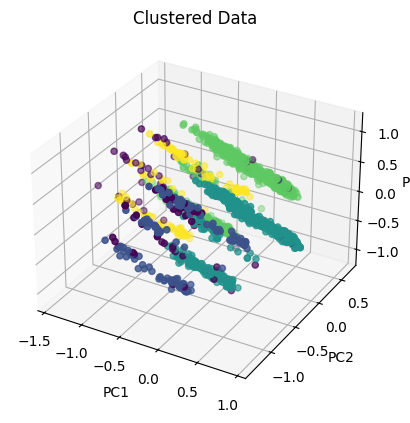

In [131]:
from sklearn.cluster import KMeans, DBSCAN
from mpl_toolkits.mplot3d import Axes3D

pcaData, _, _ = PCA(cdf_normalized, 3)
kmeans = KMeans(n_clusters=3, init = 'random', n_init=30)
kmeans.fit(pcaData)
B = kmeans.predict(pcaData)
cluster_counts = np.bincount(B)
for cluster_id, count in enumerate(cluster_counts):
    print(f"Cluster {cluster_id}: {count} data points")


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter( pcaData[:, 1],pcaData[:, 0], pcaData[:, 2], c=C)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Clustered Data')
plt.show()



### Prueba de DBSCAN con parametros obtenidos de metodos anteriores

[0 1 2 ... 1 2 3]


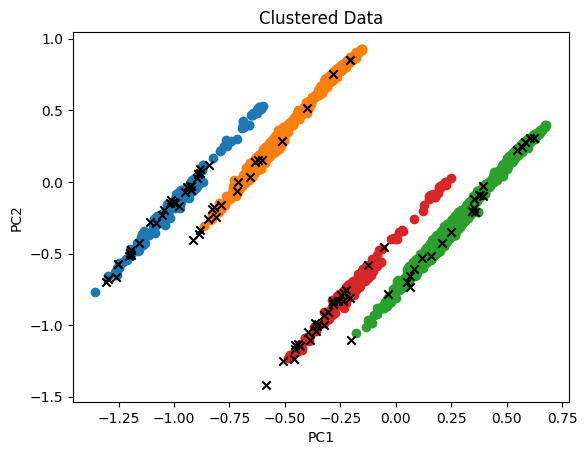

Cantidad de datos por cluster:
Cluster 0: 145
Cluster 1: 597
Cluster 2: 1260
Cluster 3: 131
Noise: 99
2232


In [132]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


dbscan = DBSCAN(eps=0.8, min_samples=10)
dbscan.fit(cdf_normalized)
C = dbscan.labels_
print(C)
cluster_counts = {}

pca = PCA(cdf_normalized, 2)
fig = plt.figure()
ax = fig.add_subplot(111)
for cluster_id in set(C):
    if cluster_id == -1:
        ax.scatter(pcaData[C == cluster_id, 0], pcaData[C == cluster_id, 1], c='k', label='Noise', marker='x')
        cluster_counts['Noise'] = sum(C == cluster_id)
        
    else:
        ax.scatter(pcaData[C == cluster_id, 0], pcaData[C == cluster_id, 1], label=f'Cluster {cluster_id}')
        cluster_counts[f'Cluster {cluster_id}'] = sum(C == cluster_id)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Clustered Data')
plt.show()

print("Cantidad de datos por cluster:")
for cluster, count in cluster_counts.items():
    print(f"{cluster}: {count}")
print(sum(cluster_counts.values()))

In [133]:
# Identificar datos relacionados dentro de cada cluster
cluster_data = {}
for cluster_id in np.unique(C):
    if cluster_id != -1:
        cluster_data[cluster_id] = cdf_normalized[C == cluster_id]

# Mostrar los datos relacionados en cada cluster
for cluster_id, data in cluster_data.items():
    print(f"Cluster {cluster_id}:")
    print(data)
    print()

Cluster 0:
           Age  Educational_num  Marital_Num    Income  Young_Sons   Recency  \
0     0.696429             0.50          1.0  0.351086    0.000000  0.585859   
15    0.892857             1.00          1.0  0.504584    0.000000  0.232323   
33    0.785714             1.00          1.0  0.279336    0.666667  0.080808   
39    0.946429             1.00          1.0  0.293887    0.000000  0.535354   
56    0.535714             0.50          1.0  0.426702    0.000000  0.303030   
...        ...              ...          ...       ...         ...       ...   
2127  0.357143             0.75          1.0  0.439287    0.000000  0.646465   
2134  0.535714             0.75          1.0  0.172437    0.666667  0.111111   
2140  0.696429             0.50          1.0  0.477814    0.000000  0.121212   
2184  0.232143             0.75          1.0  0.547007    0.000000  0.363636   
2214  0.250000             0.75          1.0  0.460872    0.000000  0.121212   

      MntWines  MntFruits  M

In [134]:
# Crear un diccionario para almacenar los valores más comunes por atributo y cluster
most_common_values_by_cluster_and_attribute = {}

# Iterar sobre cada cluster
for cluster_id, data in cluster_data.items():
    # Inicializar un diccionario para almacenar los valores más comunes por atributo en este cluster
    most_common_values_by_attribute = {}
    
    # Iterar sobre cada atributo en el dataframe del cluster
    for attribute in data.columns:
        # Encontrar el valor más común en el atributo actual
        most_common_value = data[attribute].mode().values[0]
        # Agregar el valor más común al diccionario
        most_common_values_by_attribute[attribute] = most_common_value
        
    # Almacenar los valores más comunes por atributo para este cluster
    most_common_values_by_cluster_and_attribute[cluster_id] = most_common_values_by_attribute

# Mostrar los valores más comunes por atributo y cluster
for cluster_id, most_common_values_by_attribute in most_common_values_by_cluster_and_attribute.items():
    print(f"Cluster {cluster_id}:")
    for attribute, most_common_value in most_common_values_by_attribute.items():
        print(f"Atributo: {attribute}")
        print(f"Valor más común: {most_common_value}")
    print()

Cluster 0:
Atributo: Age
Valor más común: 0.4642857142857142
Atributo: Educational_num
Valor más común: 0.5
Atributo: Marital_Num
Valor más común: 1.0
Atributo: Income
Valor más común: 0.08437949298860375
Atributo: Young_Sons
Valor más común: 0.0
Atributo: Recency
Valor más común: 0.12121212121212122
Atributo: MntWines
Valor más común: 0.0006697923643670462
Atributo: MntFruits
Valor más común: 0.0
Atributo: MntMeatProducts
Valor más común: 0.00463768115942029
Atributo: MntFishProducts
Valor más común: 0.0
Atributo: MntSweetProducts
Valor más común: 0.0
Atributo: MntGoldProds
Valor más común: 0.09392265193370165
Atributo: NumDealsPurchases
Valor más común: 0.06666666666666667
Atributo: Most_Buys_Num
Valor más común: 1.0
Atributo: Total_Buy
Valor más común: 0.1875
Atributo: NumWebVisitsMonth
Valor más común: 0.4
Atributo: Deals_Accepted
Valor más común: 0.0
Atributo: Complain
Valor más común: 0.0
Atributo: Response
Valor más común: 1.0

Cluster 1:
Atributo: Age
Valor más común: 0.3571428

In [135]:
# Calcular el rango de cada atributo en el conjunto de datos original
attribute_ranges = {}
for attribute in cdf.columns:
    attribute_min = cdf[attribute].min()
    attribute_max = cdf[attribute].max()
    attribute_ranges[attribute] = (attribute_min, attribute_max)

# Desnormalizar los datos normalizados y obtener los datos originales
original_data = {}
for cluster_id, data in cluster_data.items():
    original_data[cluster_id] = pd.DataFrame(columns=data.columns)
    for attribute in data.columns:
        min_val, max_val = attribute_ranges[attribute]
        original_data[cluster_id][attribute] = data[attribute] * (max_val - min_val) + min_val

for cluster_id, data in original_data.items():
    print(f"Cluster {cluster_id}:")
    print(data)
    print()

Cluster 0:
       Age  Educational_num  Marital_Num   Income  Young_Sons  Recency  \
0     67.0              2.0          1.0  58138.0         0.0     58.0   
15    78.0              4.0          1.0  82800.0         0.0     23.0   
33    72.0              4.0          1.0  46610.0         2.0      8.0   
39    81.0              4.0          1.0  48948.0         0.0     53.0   
56    58.0              2.0          1.0  70287.0         0.0     30.0   
...    ...              ...          ...      ...         ...      ...   
2127  48.0              3.0          1.0  72309.0         0.0     64.0   
2134  58.0              3.0          1.0  29435.0         2.0     11.0   
2140  67.0              2.0          1.0  78499.0         0.0     12.0   
2184  41.0              3.0          1.0  89616.0         0.0     36.0   
2214  42.0              3.0          1.0  75777.0         0.0     12.0   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0        635.0     

In [136]:
# Crear un diccionario para almacenar los valores más comunes por atributo y cluster
most_common_values_by_cluster_and_attribute = {}

# Iterar sobre cada cluster
for cluster_id, data in original_data.items():
    # Inicializar un diccionario para almacenar los valores más comunes por atributo en este cluster
    most_common_values_by_attribute = {}
    
    # Iterar sobre cada atributo en el dataframe del cluster
    for attribute in data.columns:
        # Encontrar el valor más común en el atributo actual
        most_common_value = data[attribute].mode().values[0]
        # Agregar el valor más común al diccionario
        most_common_values_by_attribute[attribute] = most_common_value
        
    # Almacenar los valores más comunes por atributo para este cluster
    most_common_values_by_cluster_and_attribute[cluster_id] = most_common_values_by_attribute

# Mostrar los valores más comunes por atributo y cluster
for cluster_id, most_common_values_by_attribute in most_common_values_by_cluster_and_attribute.items():
    print(f"Cluster {cluster_id}:")
    for attribute, most_common_value in most_common_values_by_attribute.items():
        print(f"Atributo: {attribute}")
        print(f"Valor más común: {most_common_value}")
    print()

Cluster 0:
Atributo: Age
Valor más común: 53.99999999999999
Atributo: Educational_num
Valor más común: 2.0
Atributo: Marital_Num
Valor más común: 1.0
Atributo: Income
Valor más común: 15287.0
Atributo: Young_Sons
Valor más común: 0.0
Atributo: Recency
Valor más común: 12.0
Atributo: MntWines
Valor más común: 1.0
Atributo: MntFruits
Valor más común: 0.0
Atributo: MntMeatProducts
Valor más común: 8.0
Atributo: MntFishProducts
Valor más común: 0.0
Atributo: MntSweetProducts
Valor más común: 0.0
Atributo: MntGoldProds
Valor más común: 34.0
Atributo: NumDealsPurchases
Valor más común: 1.0
Atributo: Most_Buys_Num
Valor más común: 2.0
Atributo: Total_Buy
Valor más común: 6.0
Atributo: NumWebVisitsMonth
Valor más común: 8.0
Atributo: Deals_Accepted
Valor más común: 0.0
Atributo: Complain
Valor más común: 0.0
Atributo: Response
Valor más común: 1.0

Cluster 1:
Atributo: Age
Valor más común: 48.0
Atributo: Educational_num
Valor más común: 2.0
Atributo: Marital_Num
Valor más común: 1.0
Atributo: 

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir las distancias a una matriz
attribute_distance_matrix = np.zeros((len(attribute_names), len(attribute_names)))
for i, attribute_name1 in enumerate(attribute_names):
    for j, attribute_name2 in enumerate(attribute_names):
        attribute_distance_matrix[i, j] = attribute_distances[(attribute_name1, attribute_name2)]

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(attribute_distance_matrix, annot=True, xticklabels=attribute_names, yticklabels=attribute_names, cmap='viridis')
plt.title('Distancias entre atributos')
plt.xlabel('Atributos')
plt.ylabel('Atributos')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

NameError: name 'attribute_names' is not defined

In [ ]:
from scipy.spatial.distance import euclidean

# Calcular los centroides de cada cluster
cluster_centroids = {}
for cluster_id, data in cluster_data.items():
    centroid = data.mean(axis=0)
    cluster_centroids[cluster_id] = centroid

# Calcular las distancias entre los centroides de cada par de clusters
cluster_distances = {}
cluster_ids = list(cluster_data.keys())
for i, cluster_id1 in enumerate(cluster_ids):
    for j, cluster_id2 in enumerate(cluster_ids):
        if i < j:  # Evitar calcular distancias duplicadas
            centroid1 = cluster_centroids[cluster_id1]
            centroid2 = cluster_centroids[cluster_id2]
            distance = euclidean(centroid1, centroid2)
            cluster_distances[(cluster_id1, cluster_id2)] = distance

# Mostrar las distancias entre los clusters
for (cluster_id1, cluster_id2), distance in cluster_distances.items():
    print(f"Distancia entre Cluster {cluster_id1} y Cluster {cluster_id2}: {distance}")

Distancia entre Cluster 0 y Cluster 1: 1.079657630846691
Distancia entre Cluster 0 y Cluster 2: 1.4633546690704369
Distancia entre Cluster 0 y Cluster 3: 1.0154009388058212
Distancia entre Cluster 1 y Cluster 2: 1.0009001103235087
Distancia entre Cluster 1 y Cluster 3: 1.479533781347736
Distancia entre Cluster 2 y Cluster 3: 1.0796802368286647


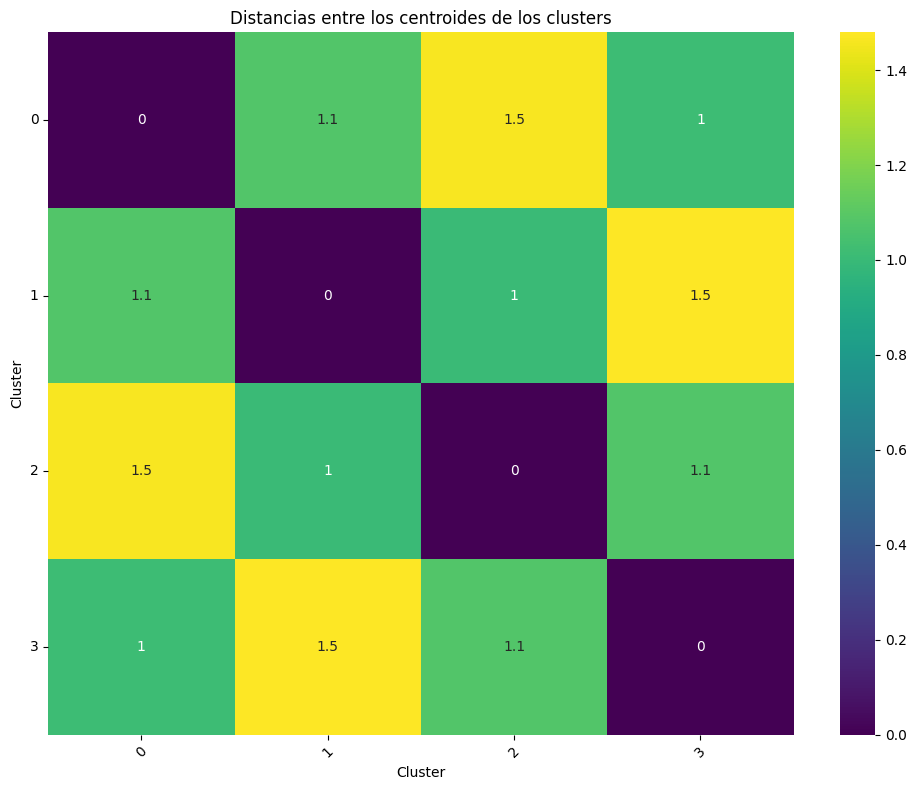

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir las distancias entre clusters a una matriz
cluster_distance_matrix = np.zeros((len(cluster_data), len(cluster_data)))
for (cluster_id1, cluster_id2), distance in cluster_distances.items():
    cluster_distance_matrix[cluster_id1, cluster_id2] = distance
    cluster_distance_matrix[cluster_id2, cluster_id1] = distance  # Para mantener simetría

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(cluster_distance_matrix, annot=True, cmap='viridis')
plt.title('Distancias entre los centroides de los clusters')
plt.xlabel('Cluster')
plt.ylabel('Cluster')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
def getBestProjection(A, C, targetdims=2):
    
    cluster_mean_list = []
    clusters_set = list(set(C))

    data = [[] for x in range(len(clusters_set))]

    for i, point in enumerate(A):
        cluster_index = clusters_set.index(C[i])
        data[cluster_index].append(point)

    for cluster_data in data:
        cluster_mean_list.append(np.average(cluster_data, axis=0))

    scores = []
    for att in range(A.shape[1]):
        score = 0
        for i in range(len(cluster_mean_list)):
            for j in range(i + 1, len(cluster_mean_list)):
                score += (cluster_mean_list[i][att] - cluster_mean_list[j][att])**2
        scores.append(score)

    max_values = heapq.nlargest(targetdims, scores)

    best_dims = []
    for element in max_values:
        best_dims.append(scores.index(element))
        
    return best_dims

In [ ]:
import numpy as np
import pandas as pd
import heapq

def getBestProjection(df, target_column, targetdims=2):
    
    cluster_mean_list = []
    clusters_set = df[target_column].unique()

    data = [[] for x in range(len(clusters_set))]

    for i, row in df.iterrows():
        cluster_index = np.where(clusters_set == row[target_column])[0][0]
        data[cluster_index].append(row.drop(target_column).values)

    for cluster_data in data:
        cluster_mean_list.append(np.average(cluster_data, axis=0))

    scores = []
    for att in df.drop(target_column, axis=1).columns:
        score = 0
        for i in range(len(cluster_mean_list)):
            for j in range(i + 1, len(cluster_mean_list)):
                score += np.sum((cluster_mean_list[i] - cluster_mean_list[j])**2)
        scores.append(score)

    max_values = heapq.nlargest(targetdims, scores)

    best_dims = []
    for element in max_values:
        best_dims.append(scores.index(element))
        
    return best_dims

# Ejemplo de uso con un DataFrame:
data = {
    'feature1': [1, 4, 7],
    'feature2': [2, 5, 8],
    'feature3': [3, 6, 9],
    'cluster': [0, 1, 0]
}

df = pd.DataFrame(data)
print(getBestProjection(df, 'cluster'))

### Elección de candidatos

In [ ]:
#K-means con
candidate_1 = B
print(candidate_1)

#dbscan con epsilon 0.8 y min points 10
candidate_2 = C
print(candidate_2)

[1 1 2 ... 1 2 2]
[0 1 2 ... 1 2 3]


### Definición de grupos de los candidatos

Para hallar cuales son las mejores representaciones de los datos, buscaremos cuales son las columnas mas significativas (atributos) calculando la media de los atributos para cada cluster y luego evaluando la diferencia cuadratica de esas medias entre todos los pares de clusters.


In [ ]:
def find_best_columns(data, labels, num_columns=3):
    # Calcula la media de cada atributo para cada cluster
    cluster_means = np.array([np.mean(data[labels == idx], axis=0) for idx in np.unique(labels)])
    
    # Calcula la puntuación de cada atributo basada en la diferencia cuadrática de las medias entre clusters
    scores = np.sum((cluster_means[:, None] - cluster_means[None, :]) ** 2, axis=(0, 1))
    
    # Selecciona los índices de los mejores atributos
    best_indices = np.argsort(scores)[::-1][:num_columns]
    
    return best_indices

In [ ]:
best_columns_candidate1 = find_best_columns(cdf, candidate_1, 3)
best_columns_candidate2 = find_best_columns(cdf, candidate_2, 3)

print("Índices de las mejores tres atributos del candidato 1:", best_columns_candidate1)
print("Índices de las mejores tres atributos del candidato 2:", best_columns_candidate2)

print("Las mejores tres atributos del candidato 1 son:", cdf.columns[best_columns_candidate1], "\n")
print("Las mejores tres atributos del candidato 2 son:", cdf.columns[best_columns_candidate2], "\n")

Índices de las mejores tres atributos del candidato 1: [3 8 6]
Índices de las mejores tres atributos del candidato 2: [3 6 8]
Las mejores tres atributos del candidato 1 son: Index(['Income', 'MntMeatProducts', 'MntWines'], dtype='object') 

Las mejores tres atributos del candidato 2 son: Index(['Income', 'MntWines', 'MntMeatProducts'], dtype='object') 



De acuerdo a esto, se pueden ver los 3 mejores atributos para cada clustering, en este caso son los mismos.

### Graficas en mejores dimensiones

Ahora graficaremos en 2D y 3D los dos candidatos con sus respectivos 3 mejores atributos.

In [194]:

def calculate_sse(data, clusters, number_clusters):
    centroids = []

    for index in range(number_clusters):
        points = data[clusters == index]
        centroid = np.mean(points, axis=0)
        centroids.append(centroid)

    sse = 0
    for i in range(len(data)):
        index = clusters[i]
        centroid = centroids[index]
        point = data.iloc[i].values
        sse += np.sum((point - centroid) ** 2)
    
    return sse

# Calcula SSE para cada conjunto de datos
candidate_1_sse = calculate_sse(cdf, candidate_1, 3)
candidate_2_sse = calculate_sse(cdf, candidate_2, 4)

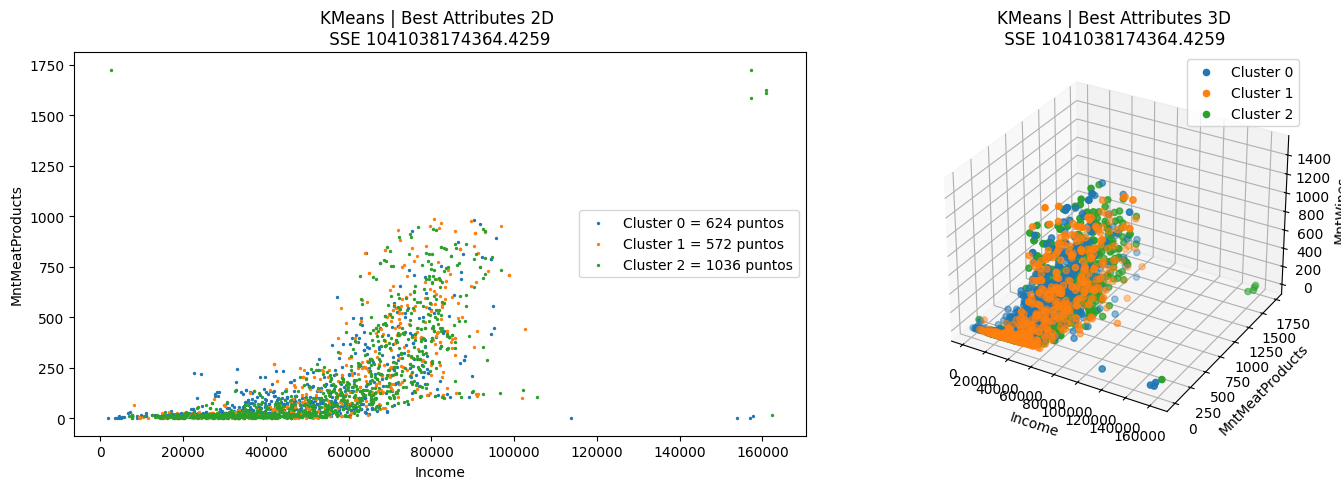

In [195]:

unique_clusters_candidate1, counts = np.unique(candidate_1, return_counts=True)

plt.figure(figsize=(15, 5))

# Gráfico 2D
plt.subplot(1, 2, 1)
for cluster_label in unique_clusters_candidate1:
    plt.scatter(cdf.iloc[:, best_columns_candidate1[0]][candidate_1 == cluster_label], cdf.iloc[:, best_columns_candidate1[1]][candidate_1 == cluster_label], label=f'Cluster {cluster_label} = {counts[cluster_label]} puntos', s=2)
plt.xlabel(cdf.columns[best_columns_candidate1[0]])
plt.ylabel(cdf.columns[best_columns_candidate1[1]])
plt.title(f'KMeans | Best Attributes 2D \n SSE {candidate_1_sse} ')
plt.legend()



# Gráfico 3D
ax = plt.subplot(1, 2, 2, projection='3d')
for cluster_label in unique_clusters_candidate1:
    ax.scatter(cdf.iloc[:, best_columns_candidate1[0]][candidate_1 == cluster_label], cdf.iloc[:, best_columns_candidate1[1]][candidate_1 == cluster_label], cdf.iloc[:, best_columns_candidate1[2]][candidate_1 == cluster_label], label=f'Cluster {cluster_label}')
ax.set_xlabel(cdf.columns[best_columns_candidate1[0]])
ax.set_ylabel(cdf.columns[best_columns_candidate1[1]])
ax.set_zlabel(cdf.columns[best_columns_candidate1[2]])
ax.set_title(f'KMeans | Best Attributes 3D\n SSE {candidate_1_sse} ')
ax.legend()

plt.tight_layout()
plt.show()

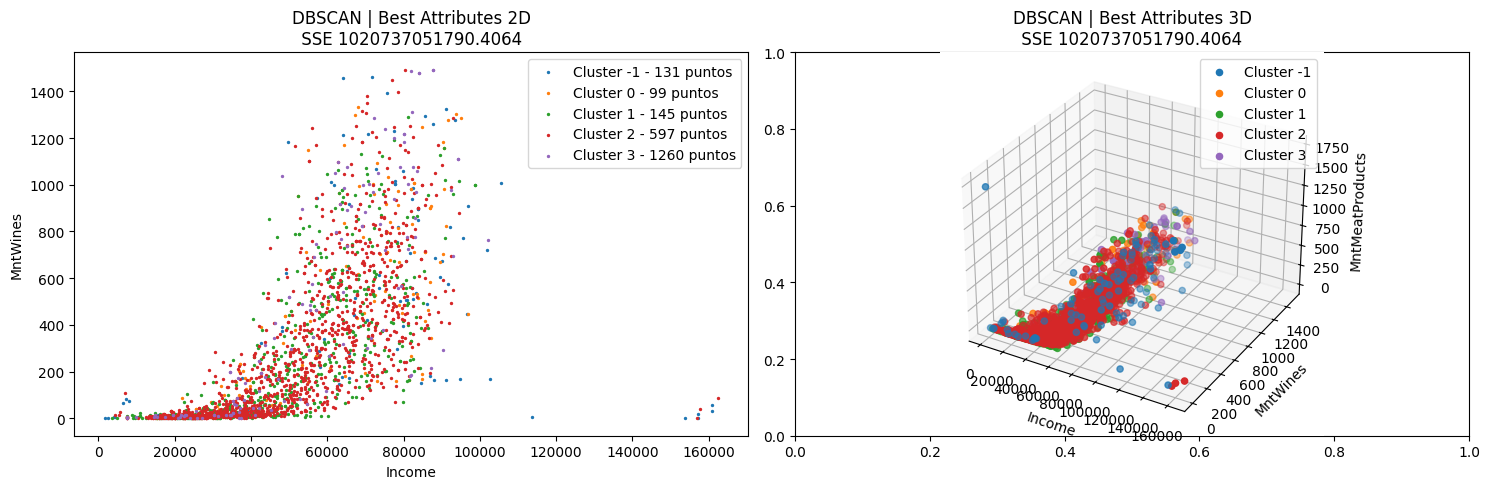

In [196]:

unique_clusters, counts = np.unique(candidate_2, return_counts=True)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))


axs[0].set_title(f'DBSCAN | Best Attributes 2D\n SSE {candidate_2_sse} ')
for cluster_label in unique_clusters:
    axs[0].scatter(cdf.iloc[:, best_columns_candidate2[0]][candidate_2 == cluster_label], cdf.iloc[:, best_columns_candidate2[1]][candidate_2 == cluster_label], label=f'Cluster {cluster_label} - {counts[cluster_label]} puntos', s=2)
axs[0].set_xlabel(cdf.columns[best_columns_candidate2[0]])
axs[0].set_ylabel(cdf.columns[best_columns_candidate2[1]])
axs[0].legend()


axs[1] = fig.add_subplot(1, 2, 2, projection='3d')
axs[1].set_title(f'DBSCAN | Best Attributes 3D\n SSE {candidate_2_sse} ')
for cluster_label in unique_clusters:
    axs[1].scatter(cdf.iloc[:, best_columns_candidate2[0]][candidate_2 == cluster_label], cdf.iloc[:, best_columns_candidate2[1]][candidate_2 == cluster_label], cdf.iloc[:, best_columns_candidate2[2]][candidate_2 == cluster_label], label=f'Cluster {cluster_label}')
axs[1].set_xlabel(cdf.columns[best_columns_candidate2[0]])
axs[1].set_ylabel(cdf.columns[best_columns_candidate2[1]])
axs[1].set_zlabel(cdf.columns[best_columns_candidate2[2]])
axs[1].legend()

plt.tight_layout()
plt.show()

Ya con estas graficas, podemos observar que no hay una gran diferenciación entre los clusters y la medición del SSE es relativamente cercana para los dos clustering. Sin embargo, el mejor clustering segun esta metrica seria el menor, es decir el de DBSCAN, de todas maneras seguiremos haciendo el analisis con los 2 candidatos y explorando mas posibilidades con otros atributos. 